In [ ]:
#No need to connect my Gdrive
#I'm using session storage

# Limpieza y Visualización De Datos

In [42]:
import pandas as pd

df = pd.read_csv('/content/casasboston-1.csv')
df

,TOWN,LON,LAT,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Nahant,-70.9550,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,-70.9500,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,-70.9360,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,-70.9280,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,-70.9220,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,Winthrop,-70.9860,42.2312,22.4,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,Winthrop,-70.9910,42.2275,20.6,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,Winthrop,-70.9948,42.2260,23.9,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,Winthrop,-70.9875,42.2240,22.0,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


## Reducción

In [43]:
NUMERICS = ('int16', 'int32', 'int64', 'float16', 'float32', 'float64')
new_names = {"TOWN":"CIUDAD",
             "CRIM":"INDICE_CRIMEN",
             "INDUS":"PCT_ZONA_INDUSTRIAL",
             "CHAS":"RIO_CHARLES",
             "RM":"N_HABITACIONES_MEDIO",
             "MEDV":"VALOR_MEDIANO",
             "LSTAT":"PCT_CLASE_BAJA",
             "AGE" : "EDAD"}

df.rename(columns = new_names, inplace = True)
df = df[list(new_names.values())]

In [28]:
df.dtypes

CIUDAD                   object
INDICE_CRIMEN           float64
PCT_ZONA_INDUSTRIAL     float64
RIO_CHARLES               int64
N_HABITACIONES_MEDIO    float64
VALOR_MEDIANO           float64
PCT_CLASE_BAJA          float64
EDAD                    float64
dtype: object

In [54]:
df.drop_duplicates()

,CIUDAD,INDICE_CRIMEN,PCT_ZONA_INDUSTRIAL,RIO_CHARLES,N_HABITACIONES_MEDIO,VALOR_MEDIANO,PCT_CLASE_BAJA,EDAD
0,Nahant,0.00632,2.31,0,6.575,24.0,4.98,65.2
1,Swampscott,0.02731,7.07,0,6.421,21.6,9.14,78.9
2,Swampscott,0.02729,7.07,0,7.185,34.7,4.03,61.1
3,Marblehead,0.03237,2.18,0,6.998,33.4,2.94,45.8
4,Marblehead,0.06905,2.18,0,7.147,36.2,5.33,54.2
...,...,...,...,...,...,...,...,...
501,Winthrop,0.06263,11.93,0,6.593,22.4,9.67,69.1
502,Winthrop,0.04527,11.93,0,6.120,20.6,9.08,76.7
503,Winthrop,0.06076,11.93,0,6.976,23.9,5.64,91.0
504,Winthrop,0.10959,11.93,0,6.794,22.0,6.48,89.3


In [33]:
import random
ex1, ex2, ex3 = random.sample(range(len(df)), 3)

print("Dataframe total rows: ", len(df))
df_info = pd.DataFrame(data = df.dtypes)
not_missing_values_total = df.notnull().sum()
not_missing_values_percent = round(not_missing_values_total/len(df)*100,2).astype(str)+" %"

pd.concat([df_info[0].rename("Data Type"),\
           df.T[ex1].rename("Example 1"),\
           df.T[ex2].rename("Example 2"),\
           df.T[ex3].rename("Example 3"),\
           not_missing_values_total.rename("Total Not Missing"), \
           not_missing_values_percent.rename("% of not missing values")], axis=1)

Dataframe total rows:  506


,Data Type,Example 1,Example 2,Example 3,Total Not Missing,% of not missing values
CIUDAD,object,Everett,Boston Back Bay,Wilmington,506,100.0 %
INDICE_CRIMEN,float64,0.15038,13.5222,0.12816,506,100.0 %
PCT_ZONA_INDUSTRIAL,float64,25.65,18.1,6.07,506,100.0 %
RIO_CHARLES,int64,0,0,0,506,100.0 %
N_HABITACIONES_MEDIO,float64,5.856,3.863,5.885,506,100.0 %
VALOR_MEDIANO,float64,17.3,23.1,20.9,506,100.0 %
PCT_CLASE_BAJA,float64,25.41,13.33,8.79,506,100.0 %
EDAD,float64,97.0,100.0,33.0,506,100.0 %


In [16]:
df.select_dtypes(include = NUMERICS).describe().T 

,count,mean,std,min,25%,50%,75%,max
INDICE_CRIMEN,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
PCT_ZONA_INDUSTRIAL,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
RIO_CHARLES,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
N_HABITACIONES_MEDIO,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
VALOR_MEDIANO,506.0,22.528854,9.182176,5.00000,17.025000,21.20000,25.000000,50.0000
PCT_CLASE_BAJA,506.0,12.653063,7.141062,1.73000,6.950000,11.36000,16.955000,37.9700
EDAD,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000


In [17]:
df.select_dtypes(include ='object').describe(include = 'O').T

,count,unique,top,freq
CIUDAD,506,92,Cambridge,30


Text(0, 0.5, 'Conteo')

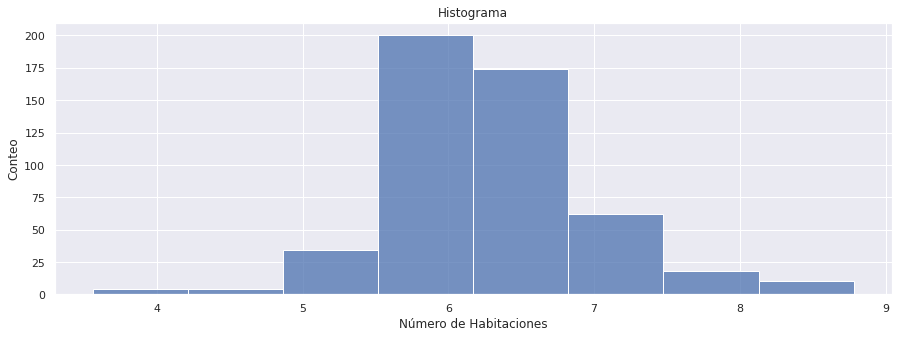

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

plt.figure(figsize=(15,5))
sns.histplot(data = df, x= "N_HABITACIONES_MEDIO", bins=8)
plt.title('Histograma')
plt.xlabel('Número de Habitaciones')
plt.ylabel('Conteo')

Text(0, 0.5, 'Zona')

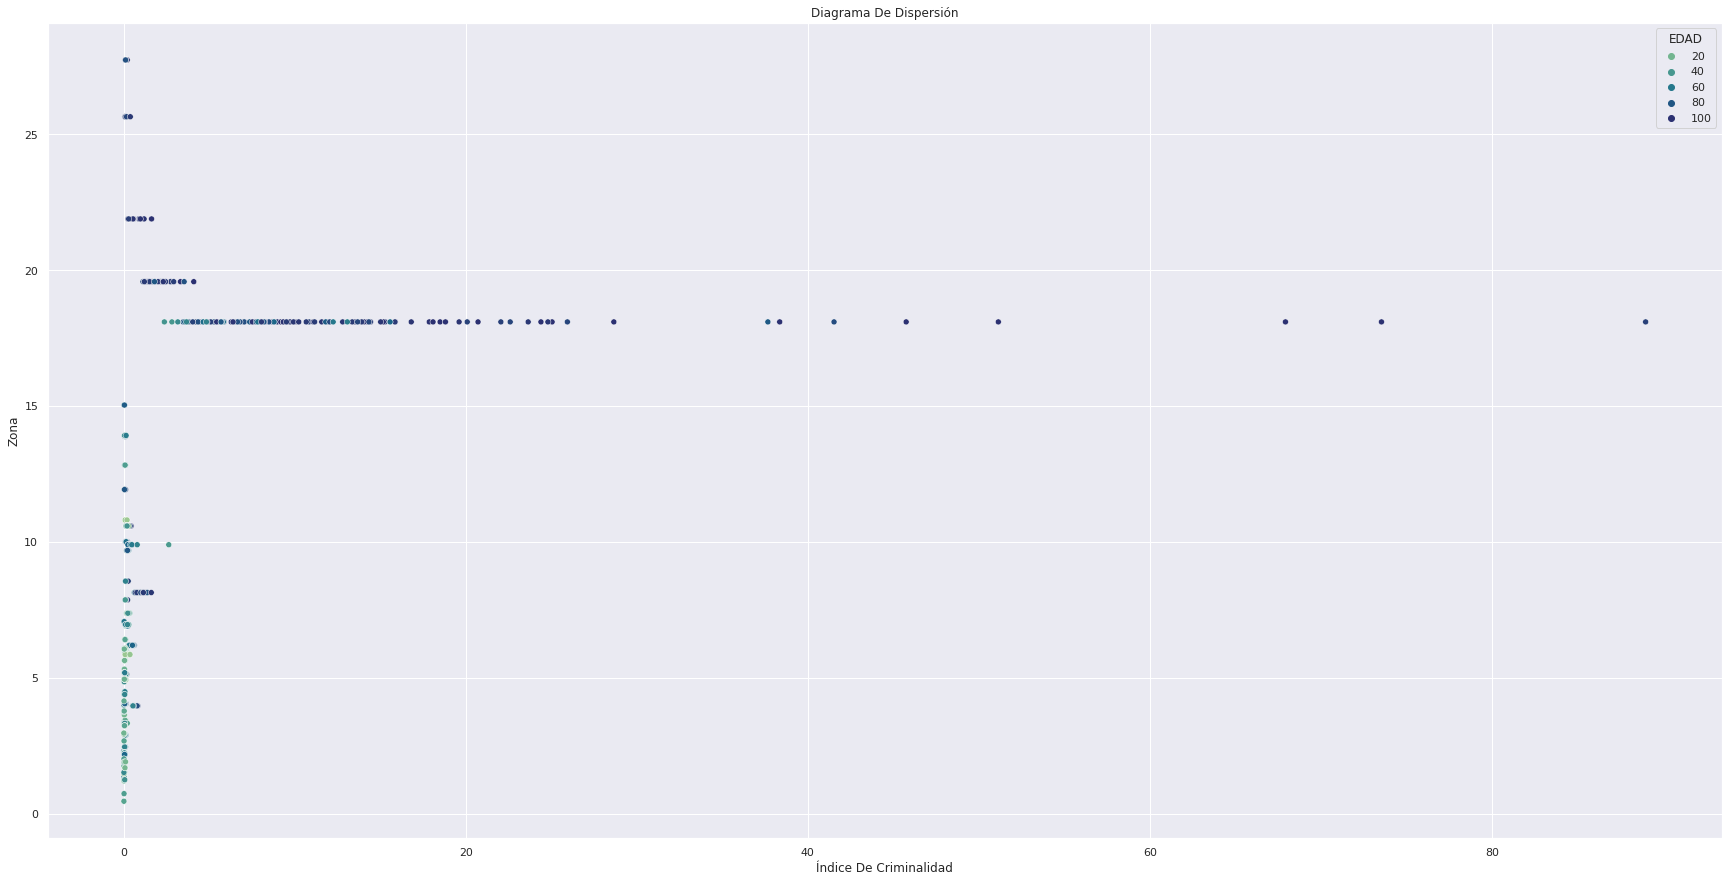

In [150]:
plt.figure(figsize=(30,15))
sns.scatterplot(data = df, x="INDICE_CRIMEN", y="PCT_ZONA_INDUSTRIAL", hue="EDAD", palette='crest')
plt.title('Diagrama De Dispersión')
plt.xlabel('Índice De Criminalidad')
plt.ylabel('Zona')

Text(0, 0.5, 'Valor Mediano Propiedad')

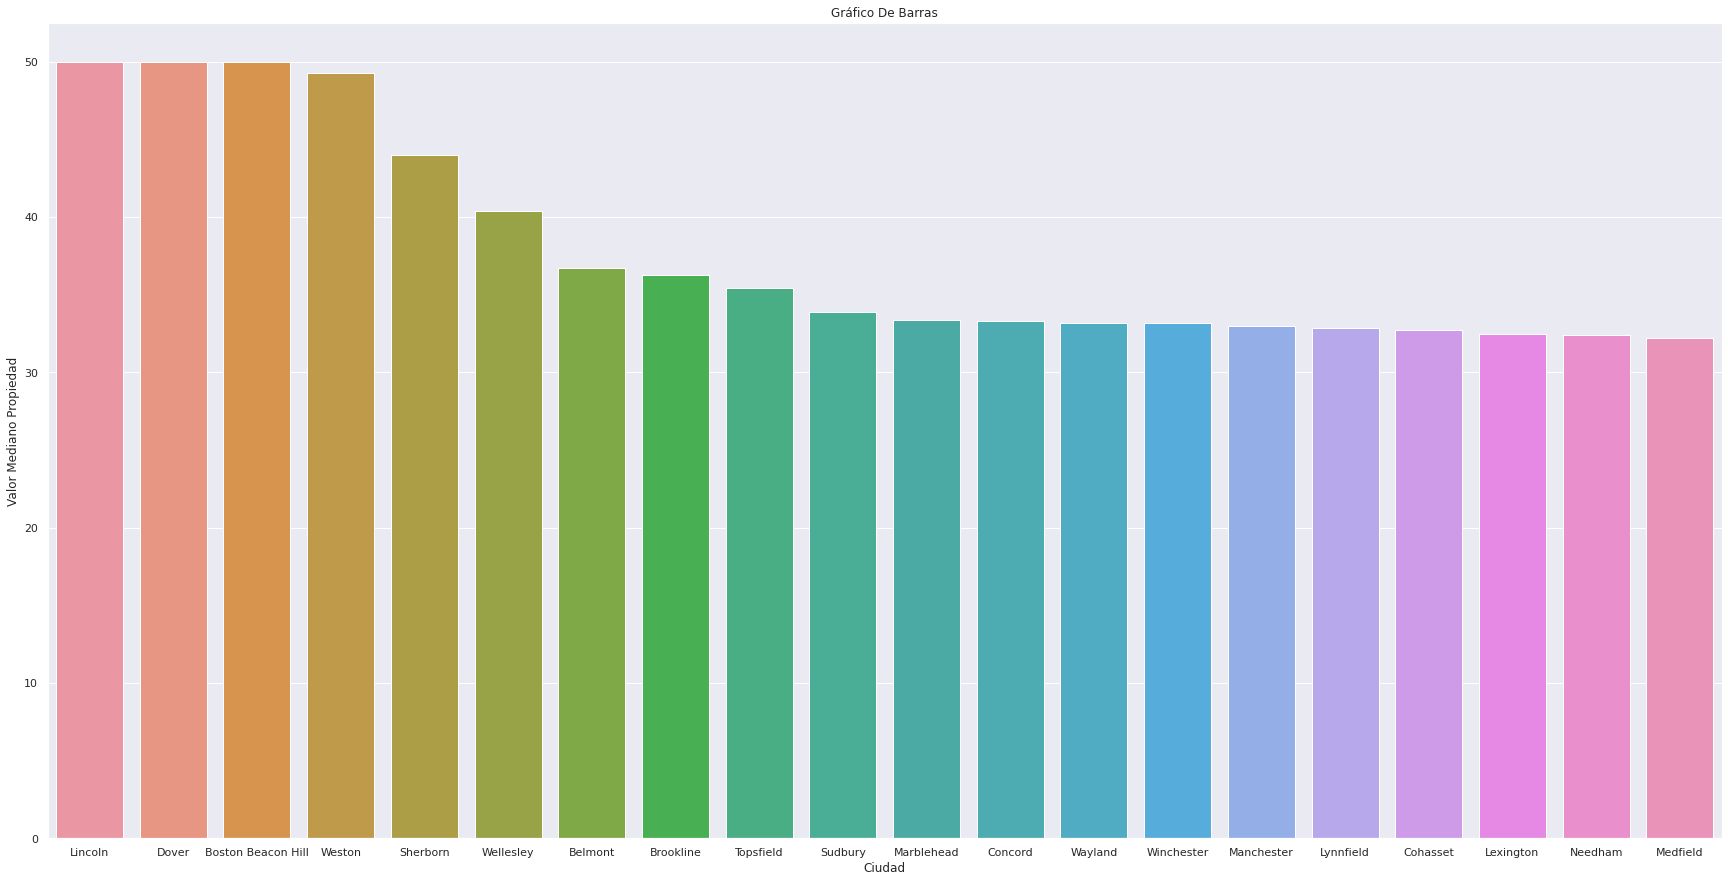

In [118]:
df_bar = df.groupby("CIUDAD")["VALOR_MEDIANO"].median()
df_bar = df_bar.reset_index()
df_bar.sort_values(by='VALOR_MEDIANO',ascending=False, inplace=True)

plt.figure(figsize=(30,15))
sns.barplot(x="CIUDAD", y="VALOR_MEDIANO", data = df_bar.head(20))
plt.title('Gráfico De Barras')
plt.xlabel('Ciudad')
plt.ylabel('Valor Mediano Propiedad')

Text(0.5, 1.0, 'Diagrama De Caja')

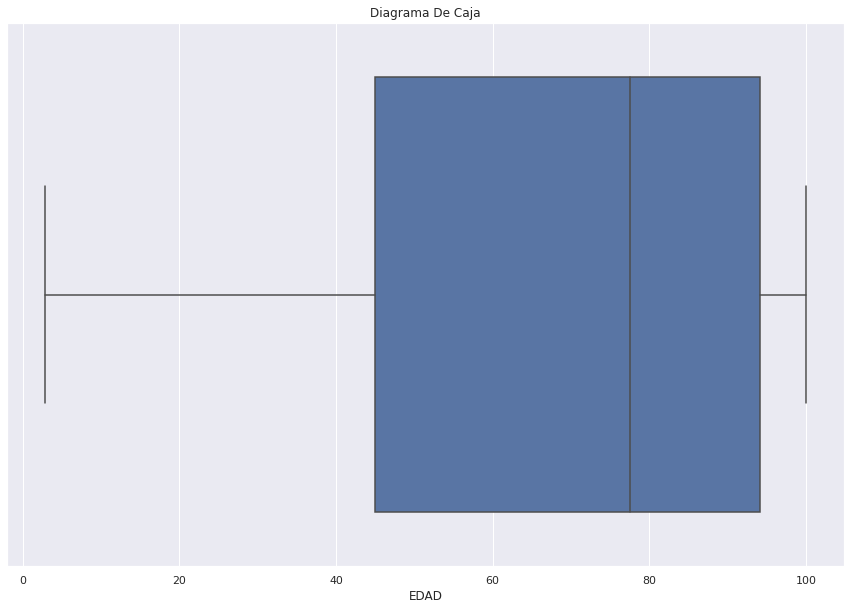

In [90]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df["EDAD"])
plt.title('Diagrama De Caja')